 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Use the Pathlib libary to set the path to the CSV

file_path = Path("../whale_portfolio_homework/Resources/whale_returns.csv")

In [3]:
 # Use the file path to read the CSV into a DataFrame

whale_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Reading whale returns

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls for the whale dataframe using the isnull and sum function

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls for the whale dataframe then display data

whale_returns = whale_df.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns dataset
## Set the path to read data
### Indexed the date column and clean the data

algo_path = Path("../whale_portfolio_homework/Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_path,index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls for the algorithmic returns dataset using isnull and sum function

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls for the algorithmic returns dataset then display data

algo_dr = algo_df.dropna()
algo_dr.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices 
## Set the path to read data
### Indexed the date column and clean the data

sptsx_path = Path("../whale_portfolio_homework/Resources/sp_tsx_history.csv")

sptsx_df = pd.read_csv(sptsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sptsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types

sptsx_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

sptsx_df["Close"] = sptsx_df["Close"].str.replace(',','')
sptsx_df["Close"] = sptsx_df["Close"].str.replace('$','')
sptsx_df.head()

C:\Users\ddout\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
sptsx_df["Close"] = sptsx_df["Close"].astype("float")
sptsx_df = sptsx_df.sort_index()
sptsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Calculate Daily Returns

sptsx_df["Close"] = (sptsx_df["Close"]/sptsx_df["Close"].shift(1)) -1
sptsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls

sp_df = sptsx_df.dropna()
sp_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.

sp_df.columns = ["S&P TSX Daily Returns"]
sp_df.head()

,S&P TSX Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns, algo_dr, sp_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

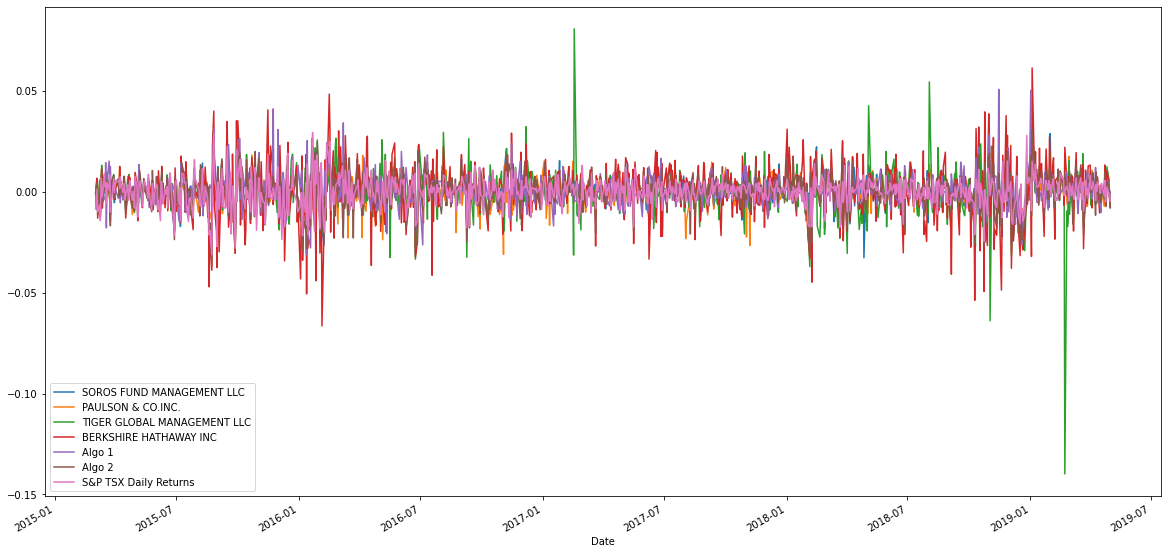

In [73]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

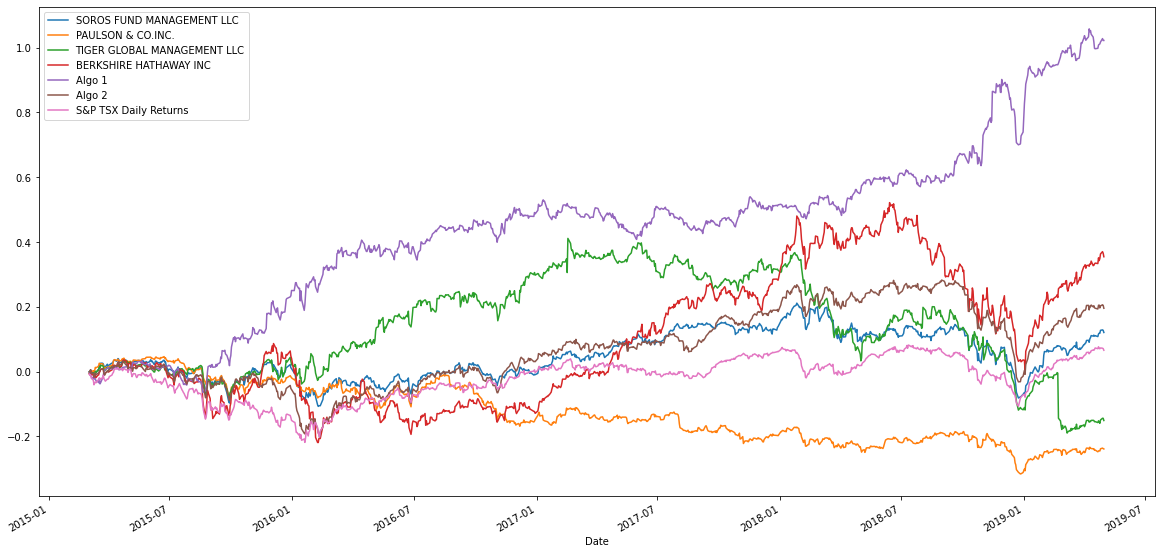

In [20]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


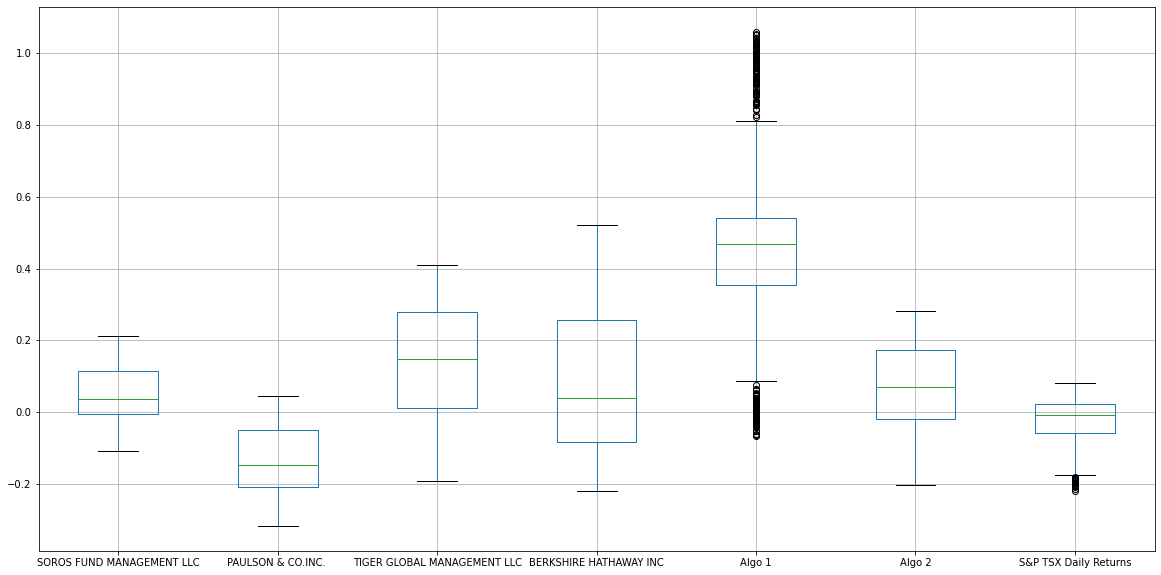

In [21]:
# Box plot to visually show risk

boxplot_cumulative_returns = cumulative_returns.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P TSX Daily Returns'],figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios

cumulative_std = cumulative_returns.std()
cumulative_std 

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
S&P TSX Daily Returns          0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60

sptsx_std = (cumulative_std["S&P TSX Daily Returns"])
sp_std_daily = sptsx_std * np.sqrt(252)
sp_std_daily

# Determine which portfolios are riskier than the S&P TSX 60
'''Tiger and Paul -add reason-

1.0215818298856933

In [24]:
# Calculate the annualized standard deviation (252 trading days)

volatility_combined =  cumulative_std * np.sqrt(252)
volatility = volatility_combined.sort_values()
volatility

S&P TSX Daily Returns          1.021582
SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
Algo 2                         1.851072
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

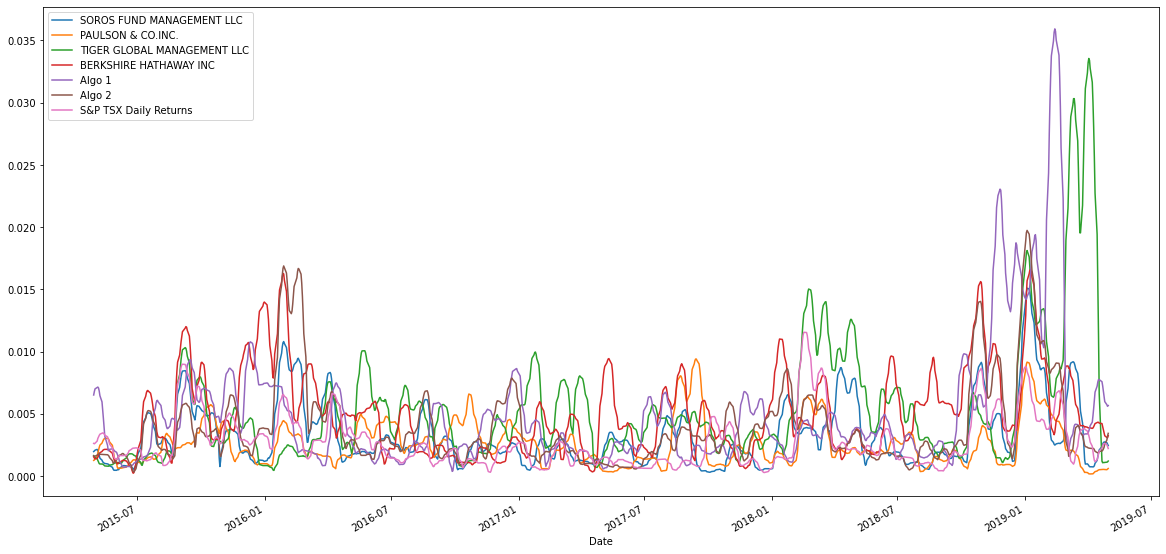

In [75]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll_std = cumulative_returns.rolling(window=21).std()
roll_std

# Plot the rolling standard deviation

roll_std.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation

price_correlation = roll_std.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.527971,0.459249,0.740752,0.553364,0.827780,0.711822
PAULSON & CO.INC.,0.527971,1.000000,0.248308,0.294088,0.371858,0.557116,0.436038
TIGER GLOBAL MANAGEMENT LLC,0.459249,0.248308,1.000000,0.416665,0.342956,0.479924,0.421851
BERKSHIRE HATHAWAY INC,0.740752,0.294088,0.416665,1.000000,0.457529,0.669220,0.563226
Algo 1,0.553364,0.371858,0.342956,0.457529,1.000000,0.548233,0.473254
Algo 2,0.827780,0.557116,0.479924,0.669220,0.548233,1.000000,0.767250
S&P TSX Daily Returns,0.711822,0.436038,0.421851,0.563226,0.473254,0.767250,1.000000


<AxesSubplot:>

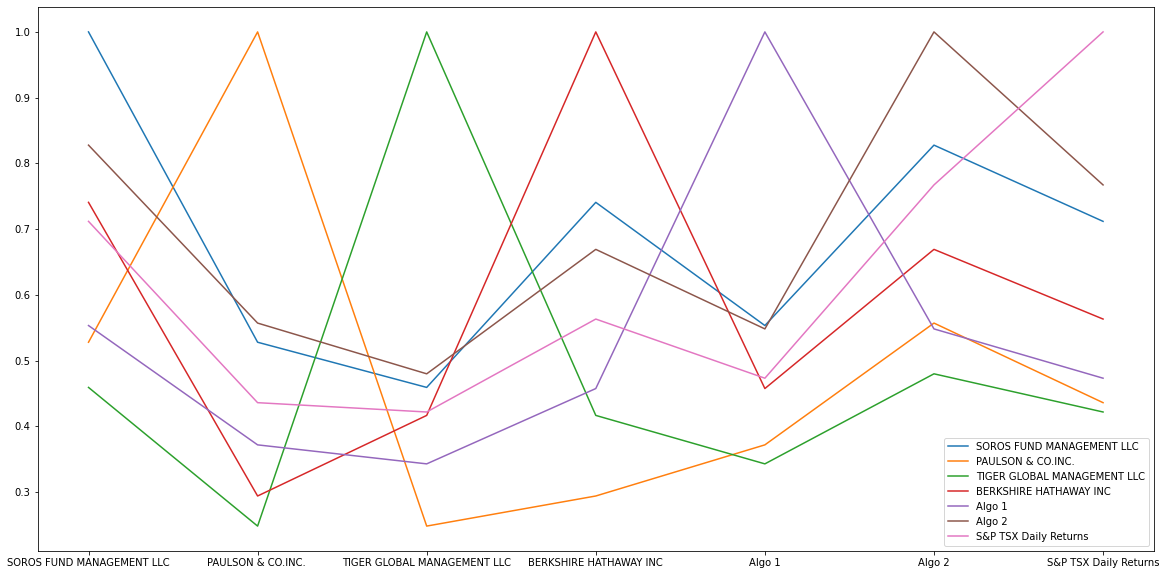

In [27]:
# Display de correlation matrix

price_correlation.plot(figsize=(20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [28]:
# Calculate covariance of a single portfolio

covariance = roll_std['S&P TSX Daily Returns'].cov(roll_std['Algo 2'])
covariance

4.5534682649848394e-05

In [29]:
# Calculate variance of S&P TSX

variance = roll_std['S&P TSX Daily Returns'].var()
variance

3.789202748694858e-05

In [30]:
# Computing beta

sp_beta = covariance / variance
sp_beta

1.2016955985142845

<AxesSubplot:title={'center':' S&P 60 TSX'}, xlabel='Date'>

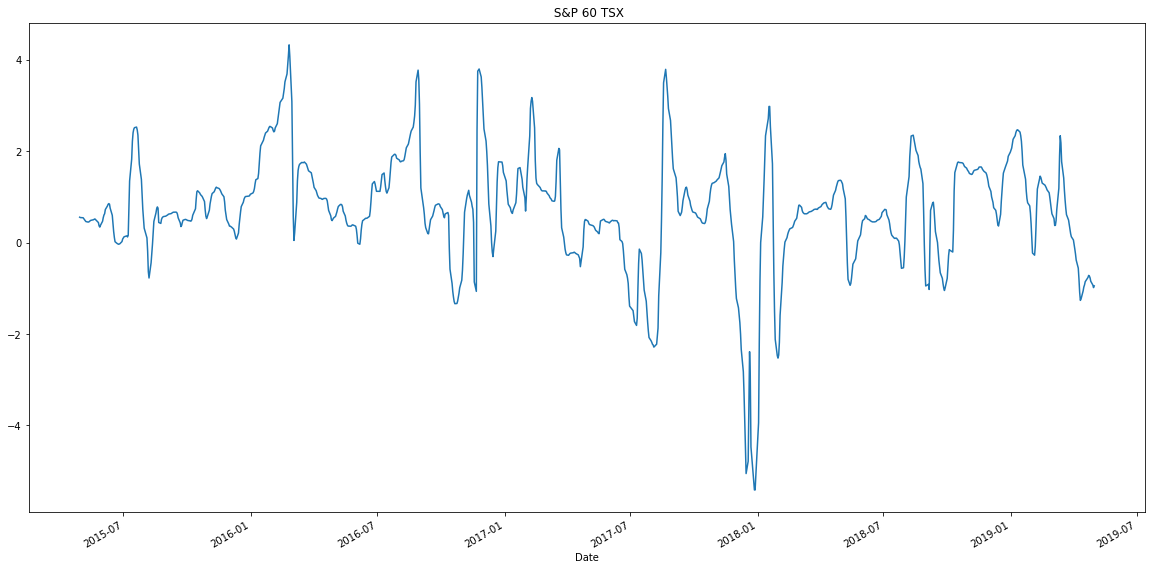

In [31]:
# Plot beta trend

rolling_covariance = roll_std['S&P TSX Daily Returns'].rolling(window=21).cov(roll_std['Algo 2'])
rolling_variance = roll_std['S&P TSX Daily Returns'].rolling(window=21).var()
sp_beta = rolling_covariance / rolling_variance
sp_beta.plot(figsize=(20, 10), title=' S&P 60 TSX')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window

weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]

ewm_returns = cumulative_returns.dot(weights)
ewm_returns.head()

Date
2015-03-03   -0.003533
2015-03-04   -0.003875
2015-03-05   -0.000753
2015-03-06   -0.009246
2015-03-09   -0.009464
dtype: float64

In [33]:
ewm_rolling = ewm_returns.rolling(window=21).std()
ewm_rolling

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.009305
2019-04-26    0.008035
2019-04-29    0.007382
2019-04-30    0.006437
2019-05-01    0.006070
Length: 1029, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX Daily Returns          0.195550
dtype: float64

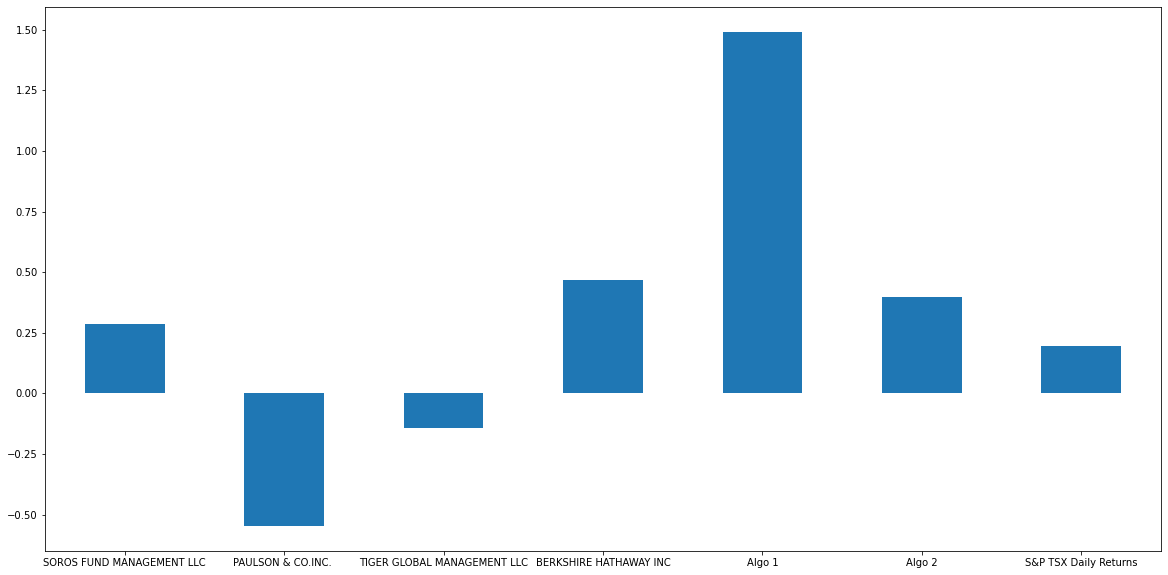

In [35]:
# Visualize the sharpe ratios as a bar plot

sharpe_bars = sharpe_ratios.plot.bar(x='Portfolio', y='Sharpe Ratio', rot=0,figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [ ]:
'''
According to the bar chart determined by the sharpe ratio; algorithmic strategies portfolio Algo 1 outperforms all whale portfolios including the S&P TSX 60.
While algorithmic strategies portfolio Algo 2 outperformed most of the other portfolios it was beaten by BERKSHIRE HATHAWAY INC portfolio and significantly less than portfolio Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock

amzn_path = Path("../whale_portfolio_homework/Resources/amzn_returns.csv")
amzn_df = pd.read_csv(amzn_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn_df.head()

,Close
Date,
2018-01-02 16:00:00,1189.01
2018-01-03 16:00:00,1204.20
2018-01-04 16:00:00,1209.59
2018-01-05 16:00:00,1229.14
2018-01-08 16:00:00,1246.87


In [39]:
# Reading data from 2nd stock

asx_path = Path("../whale_portfolio_homework/Resources/asx_returns.csv")
asx_df = pd.read_csv(asx_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
asx_df.head()

,Close
Date,
2018-01-02 16:00:00,6.62
2018-01-03 16:00:00,6.62
2018-01-04 16:00:00,6.69
2018-01-05 16:00:00,6.70
2018-01-08 16:00:00,6.66


In [40]:
# Reading data from 3rd stock

tsla_path = Path("../whale_portfolio_homework/Resources/tsla_returns.csv")
tsla_df = pd.read_csv(tsla_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.head()

,Close
Date,
2018-01-02 16:00:00,64.11
2018-01-03 16:00:00,63.45
2018-01-04 16:00:00,62.92
2018-01-05 16:00:00,63.32
2018-01-08 16:00:00,67.28


In [42]:
# Combine all stocks in a single DataFrame

combined_portfolio = pd.concat([amzn_df,asx_df,tsla_df], axis="columns", join="inner")
combined_portfolio.sort_index(inplace=True)
combined_portfolio.head()

,Close,Close,Close
Date,,,
2018-01-02 16:00:00,1189.01,6.62,64.11
2018-01-03 16:00:00,1204.20,6.62,63.45
2018-01-04 16:00:00,1209.59,6.69,62.92
2018-01-05 16:00:00,1229.14,6.70,63.32
2018-01-08 16:00:00,1246.87,6.66,67.28


In [43]:
# Reset Date index

port_df = combined_portfolio.reset_index()
port_df.head()

,Date,Close,Close,Close
0,2018-01-02 16:00:00,1189.01,6.62,64.11
1,2018-01-03 16:00:00,1204.20,6.62,63.45
2,2018-01-04 16:00:00,1209.59,6.69,62.92
3,2018-01-05 16:00:00,1229.14,6.70,63.32
4,2018-01-08 16:00:00,1246.87,6.66,67.28


In [44]:
# Reorganize portfolio data by having a column per symbol

port_df.columns = ["Date","AMZN","ASX","TSLA"]
port_df.head()

,Date,AMZN,ASX,TSLA
0,2018-01-02 16:00:00,1189.01,6.62,64.11
1,2018-01-03 16:00:00,1204.20,6.62,63.45
2,2018-01-04 16:00:00,1209.59,6.69,62.92
3,2018-01-05 16:00:00,1229.14,6.70,63.32
4,2018-01-08 16:00:00,1246.87,6.66,67.28


In [45]:
# Calculate daily returns

portfolio_df = port_df.set_index("Date")
portfolio_df.head()

daily_returns_port = portfolio_df.pct_change()
daily_returns_port.head()

,AMZN,ASX,TSLA
Date,,,
2018-01-02 16:00:00,NaN,NaN,NaN
2018-01-03 16:00:00,0.012775,0.000000,-0.010295
2018-01-04 16:00:00,0.004476,0.010574,-0.008353
2018-01-05 16:00:00,0.016163,0.001495,0.006357
2018-01-08 16:00:00,0.014425,-0.005970,0.062539


In [46]:
# Drop NAs

dr_port = daily_returns_port.dropna()

# Display sample data

dr_port.head()

,AMZN,ASX,TSLA
Date,,,
2018-01-03 16:00:00,0.012775,0.000000,-0.010295
2018-01-04 16:00:00,0.004476,0.010574,-0.008353
2018-01-05 16:00:00,0.016163,0.001495,0.006357
2018-01-08 16:00:00,0.014425,-0.005970,0.062539
2018-01-09 16:00:00,0.004676,0.001502,-0.008026


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

port_returns = dr_port.dot(weights)

# Display sample data

port_returns.head()

Date
2018-01-03 16:00:00    0.000827
2018-01-04 16:00:00    0.002232
2018-01-05 16:00:00    0.008005
2018-01-08 16:00:00    0.023665
2018-01-09 16:00:00   -0.000616
dtype: float64

In [48]:
dr_port_reset = dr_port.reset_index()
dr_port_reset.head()

,Date,AMZN,ASX,TSLA
0,2018-01-03 16:00:00,0.012775,0.000000,-0.010295
1,2018-01-04 16:00:00,0.004476,0.010574,-0.008353
2,2018-01-05 16:00:00,0.016163,0.001495,0.006357
3,2018-01-08 16:00:00,0.014425,-0.005970,0.062539
4,2018-01-09 16:00:00,0.004676,0.001502,-0.008026


In [53]:
dr_port_reset['Date'] = pd.to_datetime(dr_port_reset['Date']).dt.date
dr_port_reset.head()

,Date,AMZN,ASX,TSLA
0,2018-01-03,0.012775,0.000000,-0.010295
1,2018-01-04,0.004476,0.010574,-0.008353
2,2018-01-05,0.016163,0.001495,0.006357
3,2018-01-08,0.014425,-0.005970,0.062539
4,2018-01-09,0.004676,0.001502,-0.008026


In [50]:
portfolio_dr = dr_port_reset.set_index("Date")
portfolio_dr.head()

,AMZN,ASX,TSLA
Date,,,
2018-01-03,0.012775,0.000000,-0.010295
2018-01-04,0.004476,0.010574,-0.008353
2018-01-05,0.016163,0.001495,0.006357
2018-01-08,0.014425,-0.005970,0.062539
2018-01-09,0.004676,0.001502,-0.008026


In [51]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [52]:
# Join your returns DataFrame to the original returns DataFrame

combined_port_df = pd.concat([combined_df,portfolio_dr], axis="columns", join="inner")
combined_port_df = combined_port_df.reset_index()
combined_port_df.head()

C:\Users\ddout\anaconda3\envs\dev\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns,AMZN,ASX,TSLA
0,2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.012775,0.000000,-0.010295
1,2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004476,0.010574,-0.008353
2,2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.016163,0.001495,0.006357
3,2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.014425,-0.005970,0.062539
4,2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.004676,0.001502,-0.008026


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

new_combined_df = combined_port_df.set_index("Date")
new_combined_df.dropna()
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns,AMZN,ASX,TSLA
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.012775,0.000000,-0.010295
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004476,0.010574,-0.008353
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.016163,0.001495,0.006357
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.014425,-0.005970,0.062539
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.004676,0.001502,-0.008026


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`

new_sharpe_ratios = (new_combined_df.mean() * 252) / (new_combined_df.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -1.437678
PAULSON & CO.INC.             -1.497390
TIGER GLOBAL MANAGEMENT LLC   -1.942983
BERKSHIRE HATHAWAY INC        -0.977670
Algo 1                         1.189240
Algo 2                        -1.449390
S&P TSX Daily Returns         -1.391115
AMZN                           0.505585
ASX                           -0.932199
TSLA                           0.333359
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [58]:
# Calculate rolling standard deviation

new_roll_std = new_combined_df.rolling(window=21).std()
new_roll_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns,AMZN,ASX,TSLA
Date,,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.012633,0.008658,0.011673,0.019937,0.010529,0.012885,0.009126,0.032328,0.030881,0.028306
2018-12-21,0.012670,0.009034,0.011914,0.020542,0.010976,0.013222,0.009223,0.034517,0.031872,0.028456
2018-12-24,0.012446,0.008563,0.012400,0.020310,0.010058,0.012703,0.008372,0.034562,0.031843,0.032256


<AxesSubplot:xlabel='Date'>

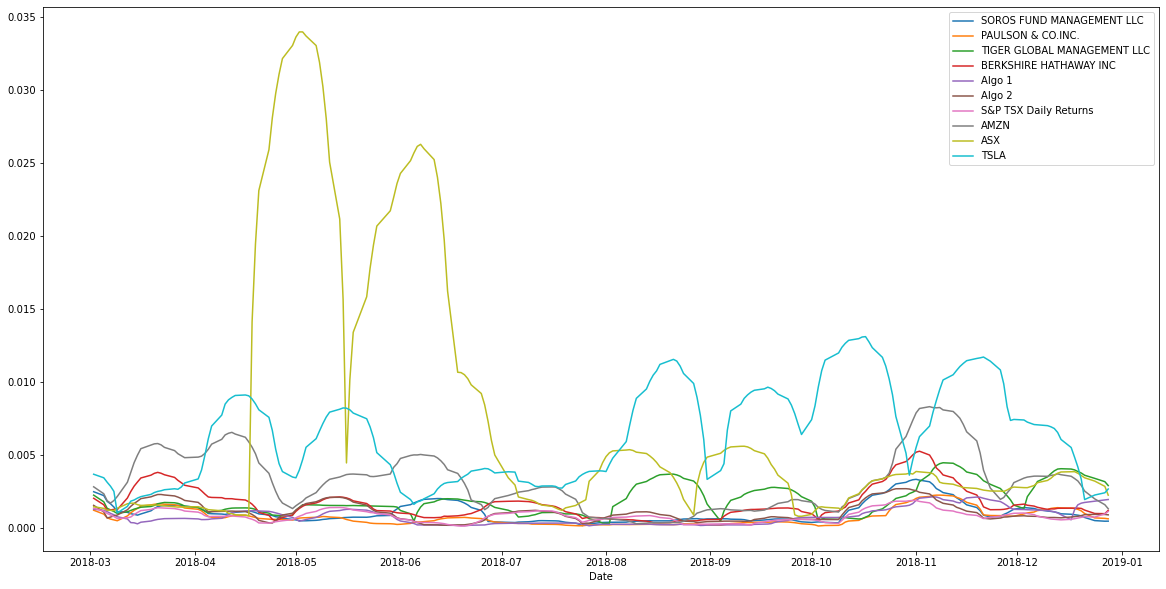

In [57]:
# Plot rolling standard deviation

new_roll_std.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [59]:
# Calculate and plot the correlation

new_price_correlation = new_roll_std.corr()
new_price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Daily Returns,AMZN,ASX,TSLA
SOROS FUND MANAGEMENT LLC,1.000000,0.918015,0.680249,0.725657,0.713169,0.831576,0.822585,0.871431,0.262974,-0.000598
PAULSON & CO.INC.,0.918015,1.000000,0.749071,0.781174,0.699414,0.881234,0.828739,0.866094,0.082653,-0.056809
TIGER GLOBAL MANAGEMENT LLC,0.680249,0.749071,1.000000,0.536454,0.547098,0.476535,0.487316,0.639178,0.162457,0.142229
BERKSHIRE HATHAWAY INC,0.725657,0.781174,0.536454,1.000000,0.859279,0.798284,0.829760,0.893621,-0.155304,0.189398
Algo 1,0.713169,0.699414,0.547098,0.859279,1.000000,0.656193,0.681635,0.863425,0.038170,0.098632
Algo 2,0.831576,0.881234,0.476535,0.798284,0.656193,1.000000,0.947283,0.803007,-0.097794,-0.057269
S&P TSX Daily Returns,0.822585,0.828739,0.487316,0.829760,0.681635,0.947283,1.000000,0.823319,-0.092970,0.102714
AMZN,0.871431,0.866094,0.639178,0.893621,0.863425,0.803007,0.823319,1.000000,0.174823,0.127045
ASX,0.262974,0.082653,0.162457,-0.155304,0.038170,-0.097794,-0.092970,0.174823,1.000000,-0.099655
TSLA,-0.000598,-0.056809,0.142229,0.189398,0.098632,-0.057269,0.102714,0.127045,-0.099655,1.000000


<AxesSubplot:>

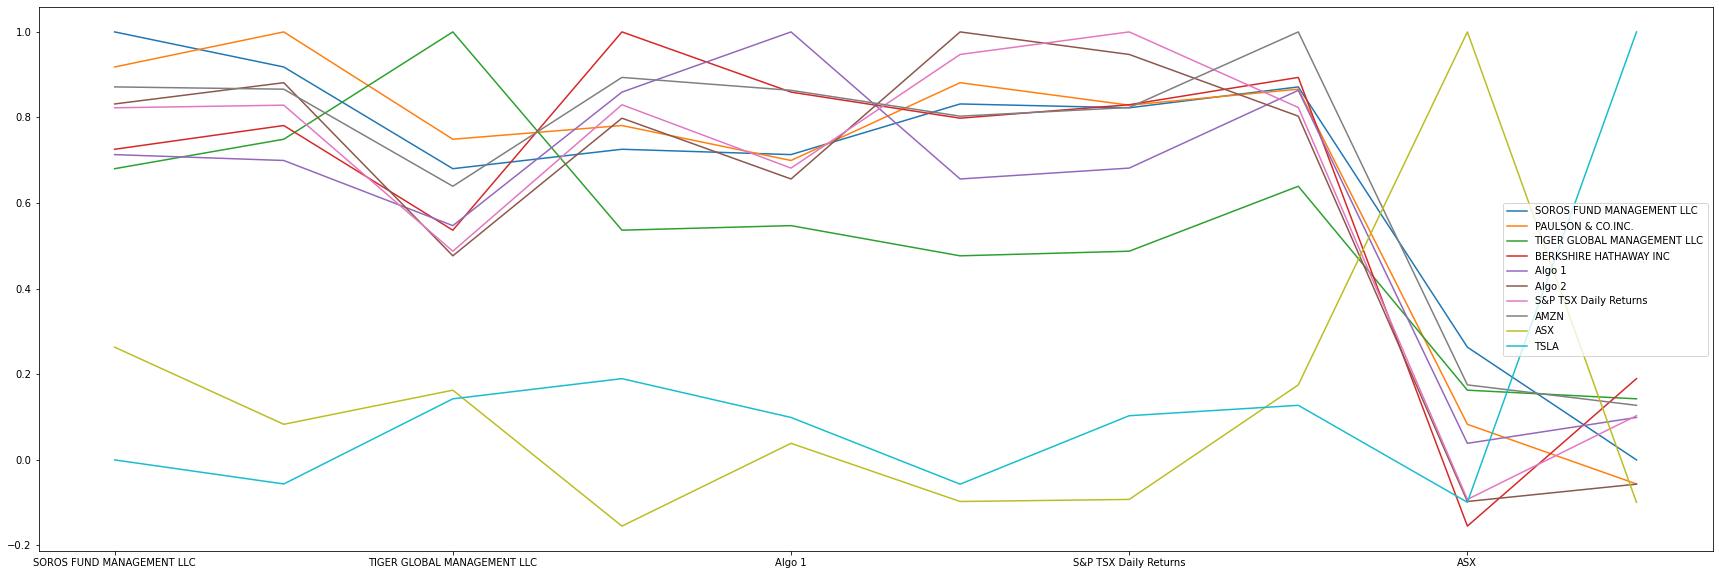

In [65]:
# Calculate and plot the correlation

new_price_correlation.plot(figsize=(30,10))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [68]:
# Calculate Beta

new_variance = new_roll_std['S&P TSX Daily Returns'].var()
print(f"new_variance: {new_variance}")

new_covariance = new_roll_std['S&P TSX Daily Returns'].cov(new_roll_std['ASX'])
print(f"new_covariance: {new_covariance}")

new_combined_beta = new_covariance / new_variance
print(f"new_combined_beta: {new_combined_beta}")

new_variance: 3.83971764651947e-06
new_covariance: -3.593124743980525e-06
new_combined_beta: -0.9357783761099022


<AxesSubplot:title={'center':' S&P 60 TSX vs ASX'}, xlabel='Date'>

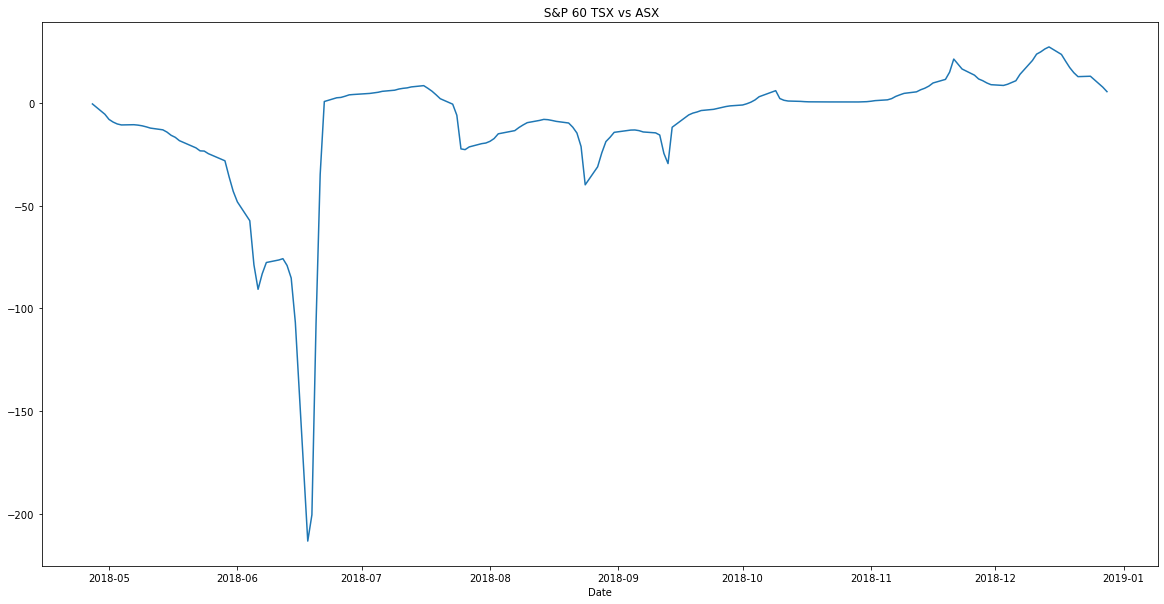

In [69]:
# Plot Beta

new_rolling_covariance = new_roll_std['S&P TSX Daily Returns'].rolling(window=60).cov(new_roll_std['ASX'])
new_rolling_variance = new_roll_std['S&P TSX Daily Returns'].rolling(window=21).var()
new_combo_beta = new_rolling_covariance / new_rolling_variance
new_combo_beta.plot(figsize=(20, 10), title=' S&P 60 TSX vs ASX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized Sharpe Ratios

new_sharpe_portfolio = (portfolio_dr.mean() * 252) / (portfolio_dr.std() * np.sqrt(252))
new_sharpe_portfolio

AMZN    0.789366
ASX    -0.878777
TSLA    0.357081
dtype: float64

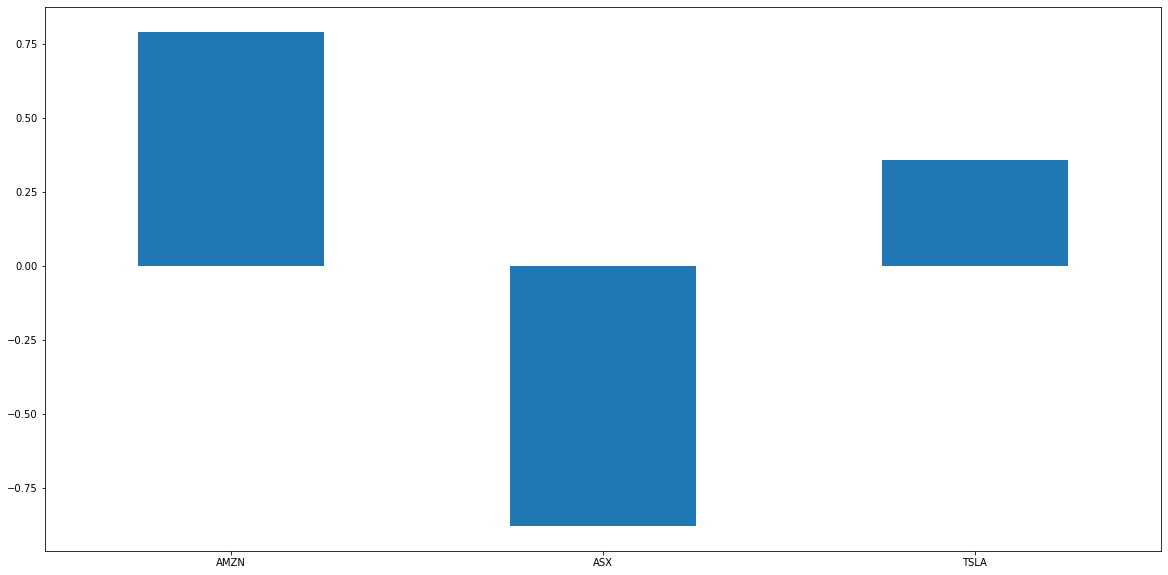

In [71]:
# Visualize the sharpe ratios as a bar plot

new_sharpe_bars = new_sharpe_portfolio.plot.bar(x='Portfolio', y='Sharpe Ratio', rot=0,figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
'''
According to the bar chart determined by the sharpe ratio; algorithmic strategies portfolio Algo 1 outperforms all whale portfolios including the S&P TSX 60.
While algorithmic strategies portfolio Algo 2 outperformed most of the other portfolios it was beaten by BERKSHIRE HATHAWAY INC portfolio and significantly less than portfolio Algo 1.